# Convolution and Edge Detection

### An Image as an Array  

As we know images have a size which is described by a width and height and this can be represented as a grid of things we call pixels. Below I am going to show some code to demonstrate how we can work with images in a computer.

First we have to include some libraries we will use

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display_html

Next, we read an image and convert it into a matrix grid. We can see below it's dimensions:

In [20]:
img = plt.imread('/home/jriva/csu/MATH369/Edge-Detection/images/butterfly.jpg')
img_length, img_width, img_depth = img.shape
print(f'length: {img_length} pixels\n'
      f'width: {img_width} pixels\n'
      f'depth: {img_depth}')

length: 2794 pixels
width: 4260 pixels
depth: 3


Above you see the length and width which you represented the size of the image but the depth may be new to you. 

The image is obviously not three dimensional, so how does it have a depth? 


The depth is the red, green, blue value for each pixel, often abbreviated as rgb. A pixel of your display on your screen is a grid of these rgb values. Any color on the spectrum can be created as a mixture of rgb values.

In summary, you can imagine an image as a matrix of rgb vectors.

Below is the color at row 2000, column 3500 which is somewhere in the wing of the butterfly 

In [7]:
pixel = img[2000,3500,:]
red, green, blue = pixel
text = f'''<div style="background: rgb({red},{green},{blue});"> &nbsp;</div>'''
html = display_html(text, raw=True)
display(html)

None

The example image I am going to use is shown below on a set of axes with the top left corner of the image being the origin: $(0,0)$.

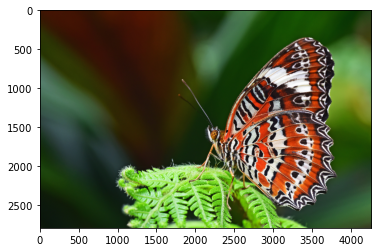

In [21]:
im_plt = plt.imshow(img)

## Convolution in Linear Algebra

Convolution is when we take a matrix, $M$, and convolve it with another matrix, $k$, often referred to as the kernel. This kernel is largely unrelated to what many know as the kernel, or null space, of a matrix being used to represent a linear transformation. 

There are many operations that can be done with convolution including image smoothing, sharpening, blurring, and edge detection. These are accomplished with different choices of kernel. 

Given kernel, $w$, and an image represented by the function $f(x,y)$ where x is the row coordinate of the pixel and y is the column coordinate of the pixel and $f(x,y)$ returns the vector of rgb values at that coordinate. 
Then the convolution is described as:

$$g(x,y) = w*f(x,y) = \sum_{dx=-1}^{1} \sum_{dy=-1}^{1}w(dx,dy)*f(x+dx,y+dy)$$

and a kernel:
$$
\begin{bmatrix}
a & b & c \\
d & e & f \\
g & h & i \\
\end{bmatrix}
$$ with $(0,0)$ starting at the center of the kernel.

Let's first do an example on a black and white image:

black and white images are a more simple case because each pixel only has one color value between black(0) and white(255)

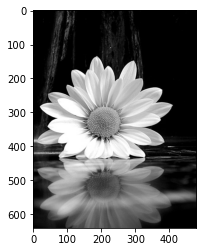

In [9]:
img2 = plt.imread('/home/jriva/csu/MATH369/Edge-Detection/images/flower.jpg')
im_plt2 = plt.imshow(img2)

We can choose any kernel, but some choices represent a certain operation on the image. Below is going to blend the values of the surrounding pixels with the central one.
$$
k = \begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
$$

let's say we we were convolving with the region centered at (row 500, column 250) which is the matrix

$$
m = \begin{bmatrix}
92 & 76 & 81 \\
94 & 80 & 85 \\
103 & 85 & 86 \\
\end{bmatrix}
$$
recall that the values in this matrix represented the color of the pixel on a scale of black(0) to white(255)

so we would take $k * m$, not to be confused with multiplying the two matrices, this means to *convolve* them.

$$
k*m = r =
\begin{bmatrix}
0 & 1 & 0 \\
1 & 1 & 1 \\
0 & 1 & 0 \\
\end{bmatrix}
*
\begin{bmatrix}
92 & 76 & 81 \\
94 & 80 & 85 \\
103 & 85 & 86 \\
\end{bmatrix} 
= 
\begin{bmatrix}
0*92 & 1*76 & 0*81 \\ 
1*94 & 1*80 & 1*85 \\
0*103 & 1*85 & 0*86 \\
\end{bmatrix}
=
\begin{bmatrix}
0 & 76 & 0 \\ 
94 & 80 & 85 \\
0 & 85 & 0 \\
\end{bmatrix} \\
sum(r) = 0*92 + 1*76 + 0*81 + 1*94 + 1*80 + 1*85 + 0*103 + 1*85 + 0*86 = 420 
$$
The new color value for that pixel would be  $\left \lfloor{\frac{sum(r)}{sum(k)}} \right \rfloor = \left \lfloor{\frac{420}{5}} \right \rfloor = 84$

## On to Edge Detection

Doing edge detection is accomplished by accomplished specific choices for the kernel. 

First, we choose a kernel which will return the derivate in the vertical direction, $G_x$, representing whether the intensity of that region is more concentrated on the top or bottom.

Next, we choose a kernel which will return the derivate in the horizontal direction, $G_y$, representing whether the intensity of that region is more concentrated on the left or right.

From these two kernels we can create a gradient for the pixel color at that position. The gradient in this context computes the direction and magnitude of most change. The gradient is made up of a x-direction and a y-direction and is represented as the vector$<G_x, G_y>$. 

It's direction is $\theta=atan(\frac{G_y}{G_x})$ 

It's magnitude is $\|G\|= \sqrt{G_x^2+G_y^2}$

Below is the vertical filter kernel

In [10]:
#source: https://towardsdatascience.com/edge-detection-in-python-a3c263a13e03

#define the vertical filter
vertical_filter = [[-1,-2,-1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]]

Here is the horizontal filter kernel

In [11]:
#define the horizontal filter
horizontal_filter = [[-1,0,1], 
                     [-2,0,2], 
                     [-1,0,1]]

#### Let's do a small example first

Lets take the region centered at (3,3) which is:
$$
r = 
\begin{bmatrix}
60 & 60 & 62 \\
62 & 61 & 62 \\
62 & 61 & 60 \\
\end{bmatrix}
$$

In [12]:
#create little local 3x3 box
local_pixels = img[3-1:3+2, 3-1:3+2, 0]
#print(local_pixels)

Now we have to apply the vertical kernel by convolving the vertical kernel, $G_x$, which the region, $r$, notated as $G_x*r$

In [13]:
#apply the vertical filter
vertical_transformed_pixels = vertical_filter*local_pixels
#print(f'G_x*r:\n {vertical_transformed_pixels}')
#remap the vertical score
vertical_score = vertical_transformed_pixels.sum()/4
#print(f'normalized vertical score: {vertical_score}')

$$
G_x*r = 
\begin{bmatrix}
-60 & -120 & -62 \\
0 & 0 & 0 \\
62 & 122 & 60 \\
\end{bmatrix}
$$

$The\:normalized\:vertical\:score = 0.5$

The normalized score is the sum of the elements in the matrix divided by 4 which maps a top edge to 4 and a bottom edge to -4

Now we have to apply the horizontal kernel by convolving the horizontal kernel, $G_y$, which the region, $r$, notated as $G_y*r$

In [14]:
#apply the horizontal filter
horizontal_transformed_pixels = horizontal_filter*local_pixels
#print(f'G_y * r: \n{horizontal_transformed_pixels}')
#remap the horizontal score
horizontal_score = horizontal_transformed_pixels.sum()/4
#print(f'normalized horizontal score: {horizontal_score}')


$$
G_y*r = 
\begin{bmatrix}
-60 & 0 & 62 \\
-124 & 0 & 124 \\
-62 & 0 & 60 \\
\end{bmatrix}
$$

$The\:normalized\:horizontal\:score = 0.5$

Then we need to get the magnitude of the vector $<G_x, G_y>$ which is $\sqrt{G_x^2+G_y^2}$

In [15]:
#combine the horizontal and vertical scores into a total edge score
edge_score = (vertical_score**2 + horizontal_score**2)**.5
#print(f'magnitude of gradient: {edge_score}')

The magnitude of the gradient is 0.5

This is the new value of the pixel in the output image which has just the edges in the image. Below is the code which 
moves the kernels across the entire image and does this process for every pixel in the interior of the image.

#### Convolving the Image

In [16]:
#get the dimensions of the image
length,width,depth = img.shape

#initialize the edges image
edges_img = img.copy()

#loop over all pixels in the image
for row in range(3, length-2):
    for col in range(3, width-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 1]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

The step below is making sure that the color vectors are real numbers between 0-1 which can be interpreted as a color from black(0) to white(1) or anywhere in between

In [17]:
#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

#### Final Product
Below is the final product which shows all of the sharp edges in the image

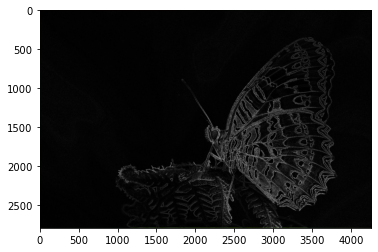

In [18]:
out = plt.imshow(edges_img)

## Resources

GitHub Pages. (n.d.). Retrieved December 15, 2020, from https://pages.github.com/

Image tutorial¶. (n.d.). Retrieved December 15, 2020, from https://matplotlib.org/3.3.3/tutorials/introductory/images.html

Kernel (image processing). (2020, October 21). Retrieved December 15, 2020, from https://en.wikipedia.org/wiki/Kernel_(image_processing)

Kharkar, R. (2020, January 22). Edge Detection in Python. Retrieved December 15, 2020, from https://towardsdatascience.com/edge-detection-in-python-a3c263a13e03

Ludwig, J. (n.d.). Image Convolution. Lecture. Retrieved from http://web.pdx.edu/~jduh/courses/Archive/geog481w07/Students/Ludwig_ImageConvolution.pdf

Unsplash. (n.d.). Beautiful Free Images &amp; Pictures. Retrieved December 15, 2020, from https://unsplash.com/

Wilson, J. B. (2019, June 03). Tensor &amp; Operators. Retrieved December 15, 2020, from https://thetensor.space/events/Tensor-Ops-I-TACA19